In [2]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib can do many things, of which we show a small selection here.  For more examples, see https://matplotlib.org/stable/gallery/index.html

Below we have an example of a histogram.  The array `data` is a randomly generated list of 10000 values, all lying between 0 and 100, and mostly lying between 40 and 60.  We divide the range from 40 to 60 into 50 bins, and count the number of data points in each bin, and plot the result as a histogram. 

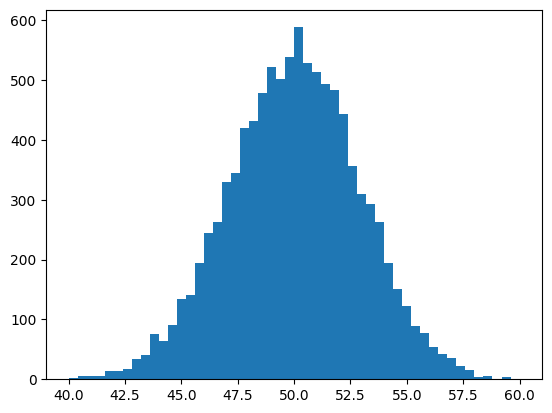

In [15]:
sample_size = 100
num_samples = 10000
samples = np.random.rand(num_samples, sample_size) # an array of 10000 arrays of 100 random numbers
data = samples.sum(axis=1) # an array of 10000 sums; each one is the sum of 100 random numbers
x_min = 40
x_max = 60
num_bins = 50
plt.hist(data, bins=num_bins, range=(x_min,x_max));



You can see that the histogram above looks roughly like a bell curve, which is the probability density function of a normal distribution.  In fact, each of our data points is the sum of $n=100$ independent random variables uniformly distributed in $[0,1]$.  If you remember some statistics, you can calculate that the expected value of each data point is $n/2$, with variance $n/12$.  As we have the sum of a large number of independent identically distributed variables, the Central Limit Theorem predicts that the distribution should be close to a normal distribution with the same mean and variance.  This means that our histogram should be close to the red curve in the plot below.

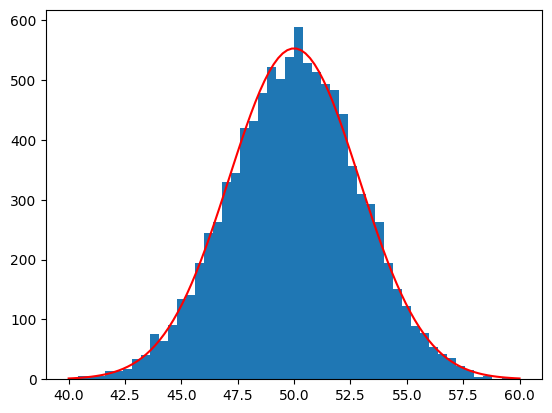

In [16]:
mean = sample_size/2
std = np.sqrt(sample_size/12)
xs = np.linspace(40,60,100)
ys = ((x_max - x_min) / num_bins * num_samples * 
      (1/(std * np.sqrt(2 * np.pi))) * np.exp(-(xs - mean)**2 / (2 * std**2))) # normal distribution
plt.hist(data, bins=num_bins, range=(x_min,x_max));
plt.plot(xs, ys, color='red');

A scatter plot of two correlated variables

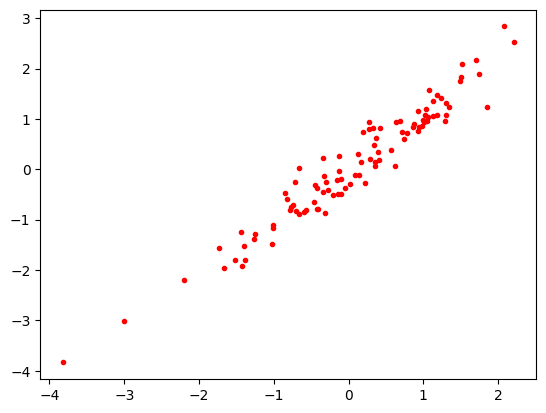

In [28]:
# Generate two random variables that are well-correlated
N = 100
u = np.random.normal(size=N)
v = u + 0.3 * np.random.normal(size=N)

# Draw a scatter plot of the two variables
plt.scatter(u, v, color='red', marker='.');


Next we have two visualisations of the function $f(x,y)=\sin(x)e^{-(y-5)^2/10}$, with $0\leq x,y\leq 10$.

We first use `np.meshgrid()` to generate a two-dimensional array `x` of $x$-values and a two-dimensional array `y` of $y$-values.  We then set $z=f(x,y)$ (so $z$ is again a two-dimensional array).  The function `plt.imshow()` creates an image in which points are coloured according to their $z$-values.

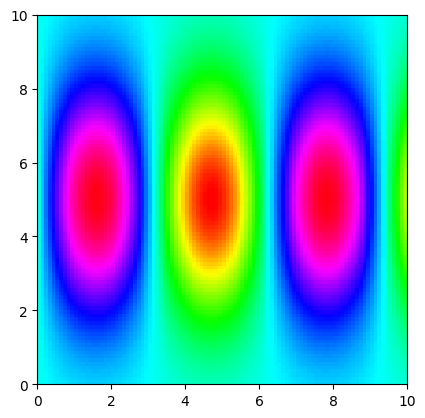

In [48]:
x, y = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
z = np.sin(x) * np.exp(- (y - 5) ** 2 / 10)
plt.imshow(z, origin='lower', extent=[0, 10, 0, 10], cmap='hsv');


Alternatively, we can use `plt.contour()` to generate a contour plot.

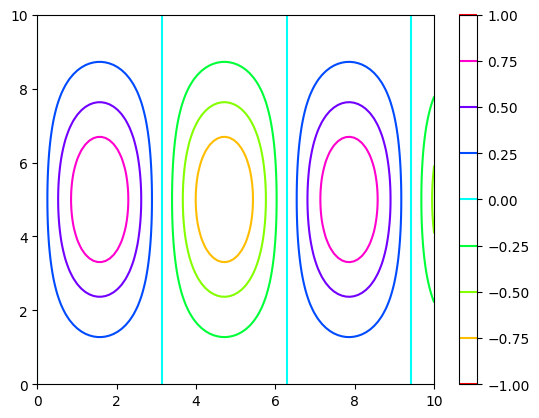

In [47]:
plt.contour(x, y, z, extent=[0, 10, 0, 10], cmap = 'hsv');
plt.colorbar();


An example of a pie chart

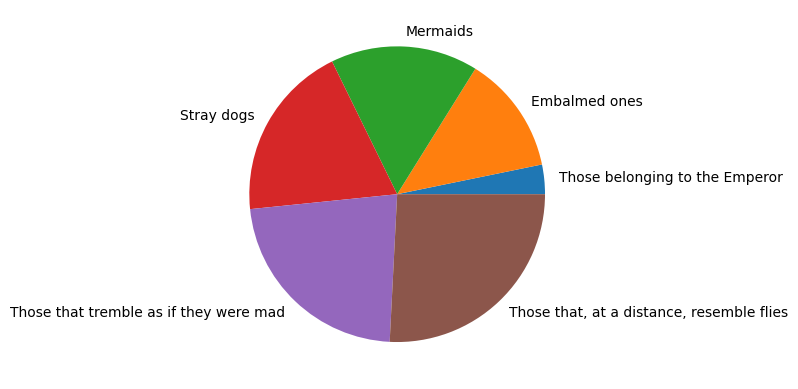

In [44]:
labels = ['Those belonging to the Emperor', 
          'Embalmed ones', 
          'Mermaids', 
          'Stray dogs', 
          'Those that tremble as if they were mad',
          'Those that, at a distance, resemble flies']
sizes = [1, 4, 5, 6, 7, 8]

plt.pie(sizes, labels=labels);